In [4]:
import face_recognition 
import cv2
import pandas
import os 
import pickle

folder=r'D:\face-recognition-attendance-system-master\data'
images=os.listdir(folder)
id_img=[]
imglist=[]
# extract names of imges
print(imglist)

[]


In [5]:
images[0]
os.path.join(folder,images[0])
Images=[]


In [7]:
listencode=[]
idencode=[]
for i in range(0,len(images)):
    path=os.path.join(folder,images[i])
    print(images[i])
    #idencode.append(images[i])  
    folders=os.listdir(path)
    #folders=os.listdir(os.path.join(folder,images[i]))
    for j in range(0,len(folders)):
        img=os.path.join(path,folders[j])
        img=cv2.imread(img)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)    
        img=face_recognition.face_encodings(img)[0]
        listencode.append(img)
        idencode.append(images[i])

10
11
12
13


In [11]:
len(listencode)

91

In [12]:
print("endoding start ")
fulldata=listencode
print(len(fulldata))
file=open(r"D:\face-recognition-attendance-system-master\strorge\known_encodings.pickle", 'wb')
pickle.dump(fulldata,file)
file.close()
print("fill savde")

endoding start 
91
fill savde


In [13]:
file=open(r"D:\face-recognition-attendance-system-master\strorge\id_encodings.pickle", 'wb')
fulldata=idencode
print(len(fulldata))
pickle.dump(fulldata,file)
file.close()
print("fill savde")

91
fill savde


In [16]:
known_face_ids=[]
with open(r"D:\face-recognition-attendance-system-master\strorge\id_encodings.pickle", "rb") as fp:
    known_face_ids = pickle.load(fp)
print(len(known_face_ids))


91


In [18]:
known_face_encodings=[]
with open(r"D:\face-recognition-attendance-system-master\strorge\known_encodings.pickle", "rb") as fp:
    known_face_encodings = pickle.load(fp)
print(len(known_face_encodings))


91


In [19]:
known_face_encodings

[array([-0.04093665,  0.0078806 ,  0.01147413, -0.05060956, -0.03841314,
         0.0178852 , -0.04094338, -0.03873119,  0.13788362,  0.02795811,
         0.20817231,  0.00143529, -0.2163453 ,  0.00580881,  0.0061685 ,
         0.0748231 , -0.24276246, -0.04237081, -0.07946732, -0.11025126,
         0.04661931, -0.0157703 ,  0.03714649,  0.10150623, -0.18526915,
        -0.25706494, -0.04725211, -0.12807733,  0.06774061, -0.05538904,
         0.05681821,  0.02716071, -0.24144019, -0.06670399,  0.03747818,
         0.07225778, -0.00160867, -0.07902913,  0.1433285 ,  0.01157964,
        -0.07705157,  0.07866476,  0.02207439,  0.25950146,  0.18169007,
         0.15490559,  0.01941146, -0.05596944,  0.10581794, -0.29145983,
         0.08264554,  0.14085837,  0.04523278,  0.03659993,  0.01982797,
        -0.20585501,  0.04030004,  0.10786863, -0.20194578,  0.0882325 ,
         0.0426333 ,  0.03291396,  0.06043424, -0.07699115,  0.22580527,
         0.07869863, -0.17681891, -0.05483374,  0.0

In [18]:
import pandas as pd
import face_recognition.api as face_recognition
import cv2
import pickle
import os
import csv
import stat
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date
from datetime import datetime
datetoday = date.today().strftime("%m_%d_%y")
datetoday2 = date.today().strftime("%d-%B-%Y")
if not os.path.isdir('Attendance'):
    os.makedirs('Attendance')
if f'Attendance-{datetoday}.csv' not in os.listdir('Attendance'):
    with open(f'Attendance/Attendance-{datetoday}.csv', 'w') as f:
        f.write('Roll,Data,Time')
def extract_attendance():
    df = pd.read_csv(f'Attendance/Attendance-{datetoday}.csv')
    Roll = df['Roll']
    Data = df['Data']
    Time = df['Time']
    l = len(df)
    return Roll, Data, Time, l
def mark_your_attendance():
    mpl.rcParams['toolbar'] = 'None'
    STORAGE_PATH = r"D:\face-recognition-attendance-system-master\strorge"
    try:
        with open(os.path.join(STORAGE_PATH, "id_encodings.pickle"), "rb") as fp:
            known_face_ids = pickle.load(fp)
        with open(os.path.join(STORAGE_PATH, "known_encodings.pickle"), "rb") as fp:
            known_face_encodings = pickle.load(fp)
        # known_face_ids = np.load("known_face_ids.npy")
        # known_face_encodings = np.load("known_face_encodings.npy")
    except:
        known_face_encodings = []
        known_face_ids = []
    name = "Unknown"
    face_locations = []
    face_encodings = []
    face_names = []
    process_this_frame = True
    sanity_count = 0
    unknown_count = 0
    marked = True
    video_capture = cv2.VideoCapture(0)
    frame = cv2.imread(
        r"D:\face-recognition-attendance-system-master\data\12\IMG-20230428-WA0016.jpg")
    #ret, frame = video_capture.read()
    plot = plt.subplot(1, 1, 1)
    plt.title("Detecting Face")
    plt.axis('off')
    im1 = plot.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    while True:
        # Grab a single frame of video
        # frame=cv2.imread()
        #ret, frame = video_capture.read()
        # print("FRAME READ WORKS")
        # Resize frame of video to 1/4 size for faster face recognition processing
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_small_frame = small_frame[:, :, ::-1]
        # Only process every other frame of video to save time
        if process_this_frame:
            # Find all the faces and face encodings in the current frame of video
            face_locations = face_recognition.face_locations(rgb_small_frame)
            face_encodings = face_recognition.face_encodings(
                rgb_small_frame, face_locations)
            face_names = []
            for face_encoding in face_encodings:
                # See if the face is a match for the known face(s)
                matches = face_recognition.compare_faces(
                    known_face_encodings, face_encoding, tolerance=0.35)
                name = "Unknown"
                face_distances = face_recognition.face_distance(
                    known_face_encodings, face_encoding)
                # print(face_distances)
                try:
                    best_match_index = np.argmin(face_distances)
                except:
                    # print("No students have been marked")
                    video_capture.release()
                    cv2.destroyAllWindows()
                    marked = False
                    return marked
                if matches[best_match_index]:
                    name = known_face_ids[best_match_index]
                    print(name)
                face_names.append(name)
        if(name == "Unknown"):
            unknown_count += 1
        else:
            unknown_count = 0
        if(unknown_count == 600):
            # video_capture.release()
            # cv2.destroyAllWindows()
            # print("You haven't been registered")
            marked = False
            unknown_count = 0
            break
        process_this_frame = not process_this_frame
        # Display the results
        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Scale back up face locations since the frame we detected in was scaled to 1/4 size
            top *= 4
            right *= 4
            bottom *= 4
            left *= 4
            # Draw a box around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
            # Draw a label with a name below the face
        #    cv2.rectangle(frame, (left, bottom - 35),
         #                 (right, bottom), (0, 255, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, name, (left + 6, bottom - 6),
                        font, 0.7, (255, 0, 255), 7)
        # print("BEFORE sHOWING")
        # Display the resulting image
        # cv2.imshow('Video', frame)
        # if cv2.waitKey(20) == 27:
        #     break
        plt.ion()
        im1.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.pause(0.001)
        # as opencv loads in BGR format by default, we want to show it in RGB.
        plt.show()
        # print("AFTER SHOWING")
        # Hit 'q' on the keyboard to quit!
        if(sanity_count == 0):
            prev_name = name
            sanity_count += 1
        elif(sanity_count < 60):
            if(prev_name == name and name != "Unknown"):
                sanity_count += 1
                prev_name = name
            else:
                sanity_count = 0
        elif(sanity_count == 60):
            # print("Face registered")
            # video_capture.release()
            # cv2.destroyAllWindows()
            sanity_count = 0
            now = datetime.now()
            dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
            date = dt_string.split(" ")[0]
            time = dt_string.split(" ")[1]
            df = pd.read_csv(f'Attendance/Attendance-{datetoday}.csv')
            if int(name) not in list(df['Roll']):
                with open(f'Attendance/Attendance-{datetoday}.csv', 'a') as f:
                    f.write(f'\n{name},{date},{time}')
            #writer.writerow([name, date, time])
            # print(name + date + time)
            break
    # Release handle to the webcam
    plt.close()
    video_capture.release()
    cv2.destroyAllWindows()
    return marked





12


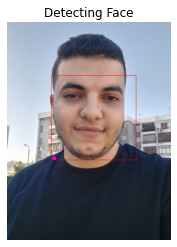

12
12
12
12
12
12
12


In [ ]:
mark_your_attendance()

In [3]:
import pandas as pd
import face_recognition.api as face_recognition
import cv2
import pickle
import os
import csv
import stat
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl



In [6]:
def Get_attendance():
    
    STORAGE_PATH = r"D:\face-recognition-attendance-system-master\strorge"
    try:
        with open(os.path.join(STORAGE_PATH, "id_encodings.pickle"), "rb") as fp:
            known_face_ids = pickle.load(fp)
        with open(os.path.join(STORAGE_PATH, "known_encodings.pickle"), "rb") as fp:
            known_face_encodings = pickle.load(fp)
        # known_face_ids = np.load("known_face_ids.npy")
        # known_face_encodings = np.load("known_face_encodings.npy")
    except:
        known_face_encodings = []
        known_face_ids = []
    name = "Unknown"
    face_locations = []
    face_encodings = []
    face_names = []
    process_this_frame = True
    sanity_count = 0
    unknown_count = 0
    marked = True
    video_capture = cv2.VideoCapture(0)
    #frame = cv2.imread(
        #r"D:\face-recognition-attendance-system-master\data\12\IMG-20230428-WA0016.jpg")
    #ret, frame = video_capture.read()
    while True:
        ret,frame=video_capture.read()
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        rgb_small_frame = small_frame[:, :, ::-1]
        if process_this_frame:
    # Find all the faces and face encodings in the current frame of video
            face_locations = face_recognition.face_locations(rgb_small_frame)
            face_encodings = face_recognition.face_encodings(
                rgb_small_frame, face_locations)
            face_names = []
            for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
                matches = face_recognition.compare_faces(
                    known_face_encodings, face_encoding, tolerance=0.40)
                name = "Unknown"
                face_distances = face_recognition.face_distance(
                    known_face_encodings, face_encoding)
                # print(face_distances)
                try:
                    best_match_index = np.argmin(face_distances)
                except:
                    # print("No students have been marked")
                    video_capture.release()
                    cv2.destroyAllWindows()
                    marked = False
                if matches[best_match_index]:
                    name = known_face_ids[best_match_index]
                    print(name)
                face_names.append(name)
            for (top, right, bottom, left), name in zip(face_locations, face_names):
                # Scale back up face locations since the frame we detected in was scaled to 1/4 size
                top *= 4
                right *= 4
                bottom *= 4
                left *= 4
                # Draw a box around the face
                cv2.rectangle(frame, (left, top), (right, bottom), (255, 0, 255), 1)
                # Draw a label with a name below the face
            #    cv2.rectangle(frame, (left, bottom - 35),
             #                 (right, bottom), (0, 255, 255), cv2.FILLED)
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(frame, name, (left + 6, bottom - 6),
                            font, 0.2, (0, 255, 255), 3) 
        cv2.imshow("frame",frame)
        key=cv2.waitKey(30)
        if key == ord('q'):
            break
    #video_capture.release()        
    cv2.destroyAllWindows() 
    return face_names

In [ ]:
data=Get_attendance()

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13


In [16]:
data

['10']